In [54]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math
import functions as f

In [55]:
problem = tsplib95.load("att48.tsp")
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

In [56]:
def get_edge_list(array):
    res=[]

    for i in range(len(array)-1):
        res.append((array[i],array[i+1]))

    res.append((array[-1],array[0]))

    return res

def get_distance(node1, node2):
    return math.dist(node1['coord'],node2['coord'])

def get_fitness(edge_list):
    fitness=0
    for pair in edge_list:
        fitness += get_distance(G.nodes[pair[0]],G.nodes[pair[1]])
    return fitness

# get_distance(G.nodes[2],G.nodes[2])
edge_list = get_edge_list(arr)
get_fitness(edge_list)


143859.0348946146

In [57]:
print(type(arr))
print(get_edge_list([i[0] for i in edge_list]))

<class 'numpy.ndarray'>
[(29, 41), (41, 39), (39, 13), (13, 28), (28, 46), (46, 8), (8, 18), (18, 32), (32, 21), (21, 19), (19, 6), (6, 31), (31, 30), (30, 33), (33, 11), (11, 27), (27, 3), (3, 42), (42, 45), (45, 4), (4, 14), (14, 47), (47, 40), (40, 1), (1, 10), (10, 25), (25, 44), (44, 12), (12, 9), (9, 37), (37, 2), (2, 24), (24, 34), (34, 23), (23, 22), (22, 15), (15, 26), (26, 43), (43, 5), (5, 35), (35, 20), (20, 38), (38, 36), (36, 48), (48, 7), (7, 16), (16, 17), (17, 29)]


In [58]:
dictionary = dict()
G.nodes[1]['coord']
for i in range(1,len(G.nodes)+1):
    dictionary[i] = G.nodes[i]['coord']
# print (dictionary)

In [59]:
# solution = tsplib95.load("a280.opt.tour").tours[0]
# solution = get_edge_list(solution)
# fig, axs = plt.subplots(1, figsize=(10,10))
# nx.draw_networkx(G, with_labels=False, node_size=10, edgelist=[], ax=axs)
# nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=10, edgelist=solution, ax=axs)
# print(get_fitness(solution))

KeyError: 242

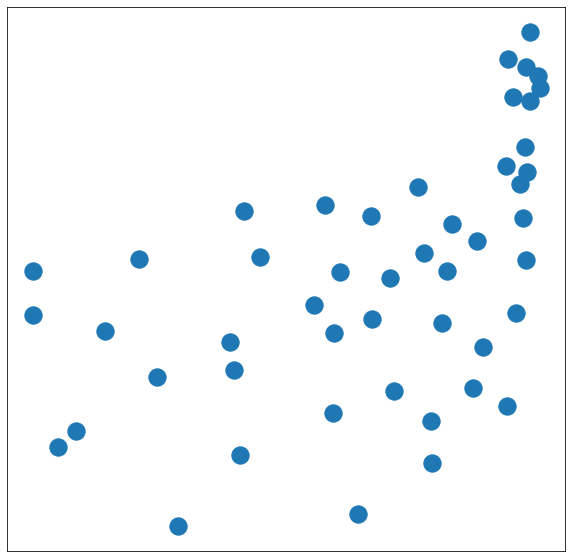

In [60]:
fig, axs = plt.subplots(1, figsize=(10,10))
nx.draw_networkx(G, pos=dictionary, with_labels=True, edgelist=solution, ax=axs)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs)
nx.draw_networkx_nodes(G, pos=dictionary, node_size=100,ax=axs)


In [ ]:
p1 = f.generate_random_inividual(G)
p2 = f.generate_random_inividual(G)

child = f.crossover(p1.get_path(), p2.get_path())

f.plot_figure(G, p1.edge_list,name="parent1.jpg")
f.plot_figure(G, p2.edge_list,name="parent2.jpg")
f.plot_figure(G, f.get_edge_list(child),name="child.jpg")


<Figure size 432x288 with 0 Axes>

3299.9528173818567


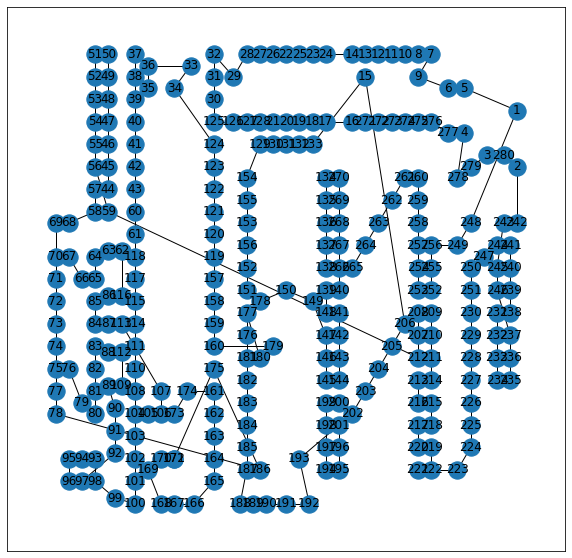

In [ ]:
path = f.closest_neighbour_alg(G)
fig, axs = plt.subplots(1, figsize=(10,10))
nx.draw_networkx(G, pos=dictionary, with_labels=True, edgelist=f.get_edge_list(path), ax=axs)
print(f.get_fitness(G,f.get_edge_list(path)))
# 0 not in [2]
# G.nodes[3]

In [65]:
positions1 = nx.get_node_attributes(G,'coord')
positions2 = f.node_positions(G)
try:
    nx.get_edge_attributes(G,'weight')[(2,1)]
except:
    nx.get_edge_attributes(G,'weight')[(1,2)]
